# Пожалуйста, делайте копию на свой Google Drive!

# Доверительный интервал для метрик модели

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()

X = df["data"]
y = df["target"]

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Распределение таргета

In [ ]:
len(X)

569

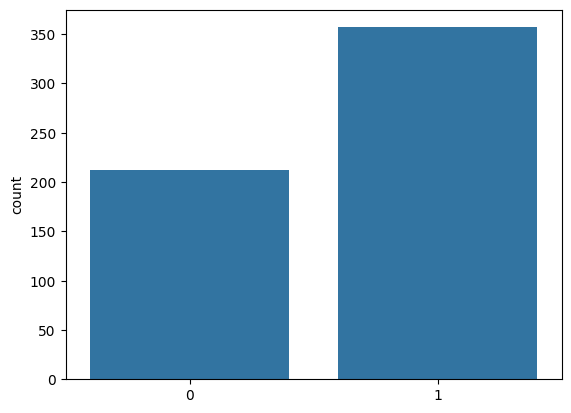

In [ ]:
import seaborn as sns

sns.countplot(x=y);

Разделим выборку

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train), len(X_test)

(398, 171)

Обучим пайплайн

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression()),
])

clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Bootstrap

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

bootstrap_iterations = 1000

acc_scores = np.zeros(bootstrap_iterations)
roc_auc_scores = np.zeros(bootstrap_iterations)


df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "y_pred_proba": y_pred_proba,
})


In [ ]:
df.shape[0]

171

In [ ]:
for i in range(bootstrap_iterations):
    sample = df.sample(frac=1, replace=True)
    acc_scores[i] = accuracy_score(sample.y_true, sample.y_pred)
    roc_auc_scores[i] = roc_auc_score(sample.y_true, sample.y_pred_proba)

In [ ]:
sample.reset_index().sort_values("index")

,index,y_true,y_pred,y_pred_proba
76,1,0,0,0.000015
141,2,0,0,0.003406
103,3,1,1,0.999449
51,3,1,1,0.999449
118,3,1,1,0.999449
...,...,...,...,...
135,165,1,1,0.998972
61,165,1,1,0.998972
133,165,1,1,0.998972
84,167,1,1,0.670462


In [ ]:
len(acc_scores), len(roc_auc_scores)

(10, 10)

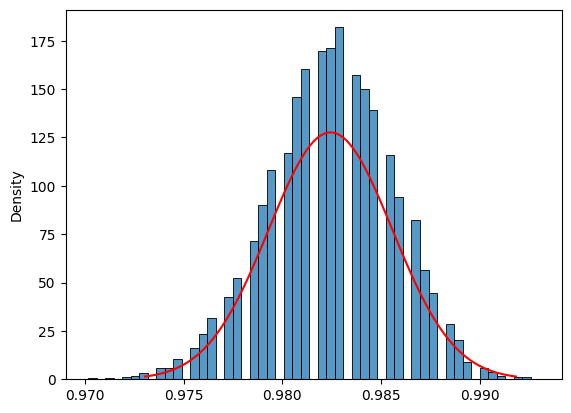

In [ ]:
from scipy.stats import norm

acc_mean = acc_scores.mean()
acc_std = acc_scores.std()

acc_low = acc_mean - 3 * acc_std
acc_upp = acc_mean + 3 * acc_std

ax = sns.histplot(acc_scores, stat="density")
x = np.linspace(acc_low, acc_upp, 100)
ax.plot(x, norm.pdf(x, loc=acc_mean, scale=acc_std), color="red");

In [ ]:
x

array([0.95121014, 0.95184362, 0.95247709, 0.95311057, 0.95374405,
       0.95437753, 0.955011  , 0.95564448, 0.95627796, 0.95691143,
       0.95754491, 0.95817839, 0.95881186, 0.95944534, 0.96007882,
       0.9607123 , 0.96134577, 0.96197925, 0.96261273, 0.9632462 ,
       0.96387968, 0.96451316, 0.96514663, 0.96578011, 0.96641359,
       0.96704707, 0.96768054, 0.96831402, 0.9689475 , 0.96958097,
       0.97021445, 0.97084793, 0.9714814 , 0.97211488, 0.97274836,
       0.97338184, 0.97401531, 0.97464879, 0.97528227, 0.97591574,
       0.97654922, 0.9771827 , 0.97781617, 0.97844965, 0.97908313,
       0.97971661, 0.98035008, 0.98098356, 0.98161704, 0.98225051,
       0.98288399, 0.98351747, 0.98415094, 0.98478442, 0.9854179 ,
       0.98605137, 0.98668485, 0.98731833, 0.98795181, 0.98858528,
       0.98921876, 0.98985224, 0.99048571, 0.99111919, 0.99175267,
       0.99238614, 0.99301962, 0.9936531 , 0.99428658, 0.99492005,
       0.99555353, 0.99618701, 0.99682048, 0.99745396, 0.99808

In [ ]:
acc_mean

0.9824584795321637

In [ ]:
print(f"Model accuracy CI: ({acc_low:.3}, {acc_upp:.3})")

Model accuracy CI: (0.973, 0.992)


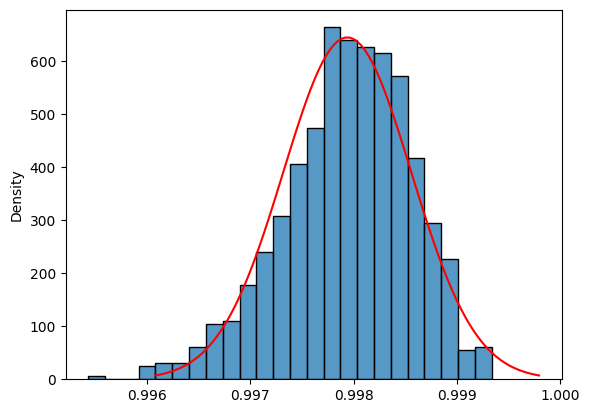

In [ ]:
roc_auc_mean = roc_auc_scores.mean()
roc_auc_std = roc_auc_scores.std()

roc_auc_low = roc_auc_mean - 3 * roc_auc_std
roc_auc_upp = roc_auc_mean + 3 * roc_auc_std

ax = sns.histplot(roc_auc_scores, stat="density")
x = np.linspace(roc_auc_low, roc_auc_upp, 100)
ax.plot(x, norm.pdf(x, loc=roc_auc_mean, scale=roc_auc_std), color="red");

In [ ]:
roc_auc_mean

0.9979381708213771

In [ ]:
print(f"Model ROC-AUC CI: ({roc_auc_low:.3}, {roc_auc_upp:.3})")

Model ROC-AUC CI: (0.996, 1.0)
